<a href="https://colab.research.google.com/github/taniya-28156/Algonivetech-Intership-/blob/main/SALES_FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [7]:
# Step 2: Load Dataset
df = pd.read_csv("/content/train.csv")
print("Shape:", df.shape)
print(df.head())

# Assuming dataset has 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


Shape: (282451, 16)
   Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0     26    92  2011-08-26      87235.57      False        61.10       3.796   
1     34    22  2011-03-25       5945.97      False        53.11       3.480   
2     21    28  2010-12-03       1219.89      False        50.43       2.708   
3      8     9  2010-09-17      11972.71      False        75.32       2.582   
4     19    55  2012-05-18       8271.82      False        58.81       4.029   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  136.213613   
1        NaN        NaN        NaN        NaN        NaN  128.616064   
2        NaN        NaN        NaN        NaN        NaN  211.265543   
3        NaN        NaN        NaN        NaN        NaN  214.878556   
4   12613.98        NaN       11.5    1705.28    3600.79  138.106581   

   Unemployment Type    Size  
0         7.767    A  152513  
1   

In [12]:
print(df.columns.tolist())

['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


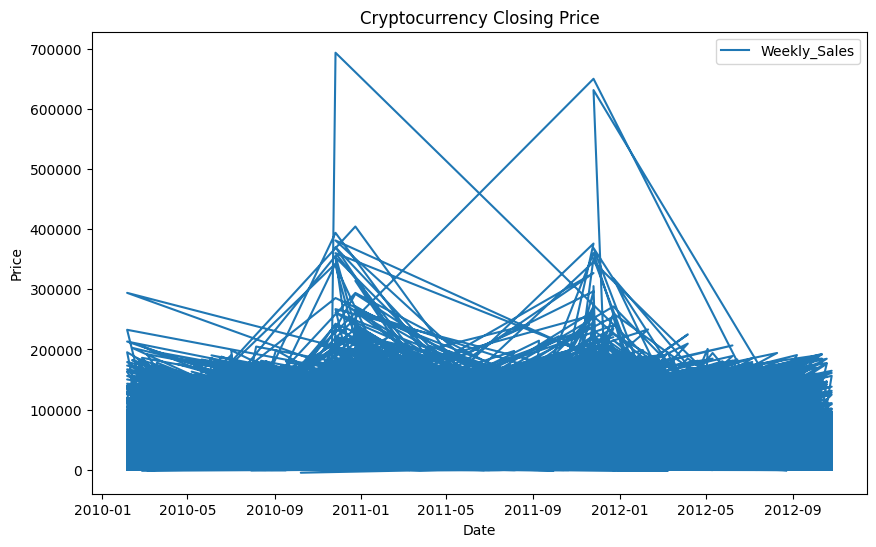

In [14]:
# Step 3: Visualize the Closing Price
plt.figure(figsize=(10,6))
plt.plot(df['Weekly_Sales'], label='Weekly_Sales')
plt.title("Cryptocurrency Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [15]:
# Step 4: Preprocess data
data = df[['Weekly_Sales']].values   # use only closing price
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [16]:
# Function to create sequences
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step, 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [17]:
# Step 5: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Step 6: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, verbose=1)

# Step 7: Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 469s 66ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 2/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 469s 66ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 3/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 473s 67ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 491s 66ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 502s 66ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 514s 67ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 501s 67ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 474s 67ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 503s 67ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 474s 67ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 11/20
7060/7060 ━━━━━━━━━━━━━━━━━━━━ 501s 67ms/step - loss: 0.0011 - val_loss: 0.00

In [19]:
# Step 8: Evaluate
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
print("RMSE:", rmse)

RMSE: 22759.09834765836


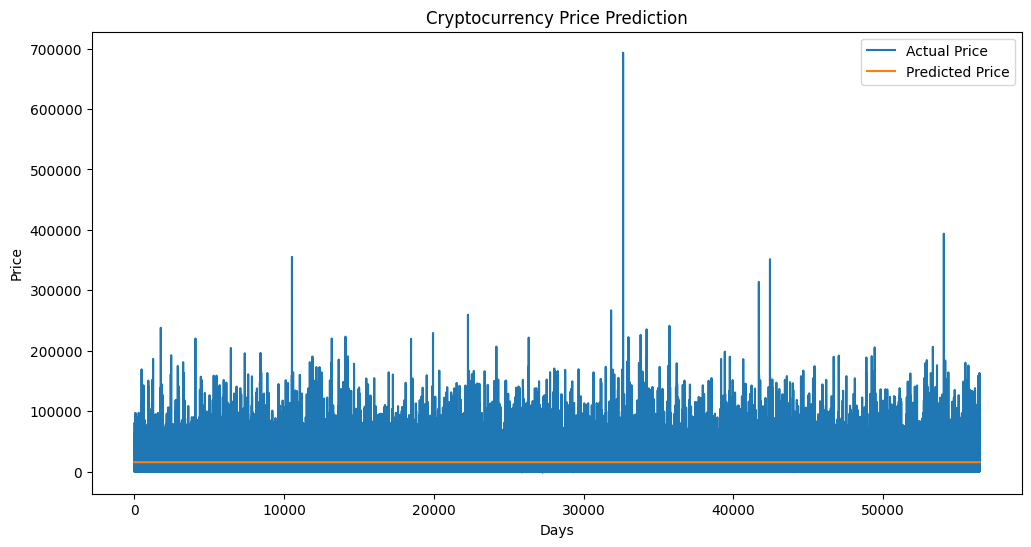

In [20]:
# Step 9: Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title("Cryptocurrency Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()